In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('csv/500andKDAid.csv')
# data = pd.read_csv('500.csv')

# Convert labels to 0 and 1
data['label'] = (data['label'] == 1).astype(int)

# Split the data into features and labels
X = data['message']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Multinomial NB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate performance
acc_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f'Accuracy (Multinomial NB): {acc_nb:.4f}')
print('Classification Report:')
print(report_nb)


Accuracy (Multinomial NB): 0.8720
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        92
           1       1.00      0.52      0.68        33

    accuracy                           0.87       125
   macro avg       0.93      0.76      0.80       125
weighted avg       0.89      0.87      0.86       125



Accuracy(Bidirectional Long Short-Term Memory [LSTM]): 0.8848
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       123
         1.0       0.85      0.67      0.75        42

    accuracy                           0.88       165
   macro avg       0.87      0.81      0.84       165
weighted avg       0.88      0.88      0.88       165

Confusion Matrix:
 [[118   5]
 [ 14  28]]


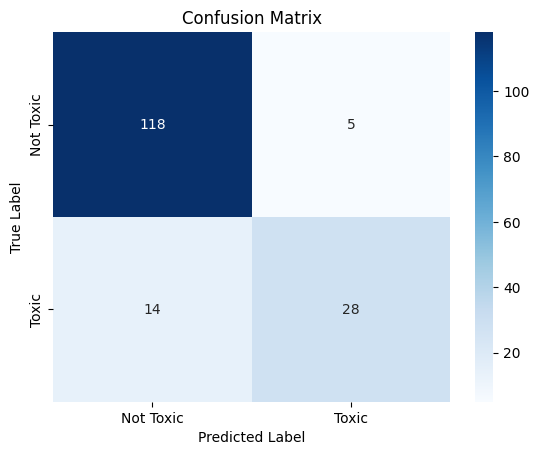

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('csv/500andKDAid.csv')
# data = pd.read_csv('500.csv')

# Preprocess the data
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Extract features and labels
X = df['message']
y = df['label']

# Use CountVectorizer to convert text data into numerical vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the Bidirectional LSTM model
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Corrected indexing
        out = self.sigmoid(out)
        return out

# Initialize the model, loss function, and optimizer
input_size = X.shape[1]
hidden_size = 128
num_layers = 2
output_size = 1

model = BiLSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(inputs.unsqueeze(1))  # Add an extra dimension for the sequence length
        loss = criterion(outputs.squeeze(), labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    model.eval()
    y_pred = model(X_test.unsqueeze(1))

y_pred = (y_pred > 0.5).float()
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy(Bidirectional Long Short-Term Memory [LSTM]): {accuracy:.4f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

# Display the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Toxic", "Toxic"], yticklabels=["Not Toxic", "Toxic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('csv/500andKDAid.csv')
# data = pd.read_csv('500.csv')

# Convert labels to 0 and 1
data['label'] = (data['label'] == 1).astype(int)

# Split the data into features and labels
X = data['message']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM with Linear Kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate performance
acc_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy (SVM with Linear Kernel): {acc_svm:.4f}')
print('Classification Report:')
print(report_svm)


Accuracy (SVM with Linear Kernel): 0.9030
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       123
           1       0.96      0.64      0.77        42

    accuracy                           0.90       165
   macro avg       0.93      0.82      0.85       165
weighted avg       0.91      0.90      0.90       165



In [6]:
# Assuming you've loaded the new dataset into a DataFrame called 'new_data'

new_data = pd.read_csv('500.csv')

# Multinomial Naive Bayes
new_data_tfidf = tfidf_vectorizer.transform(new_data['message'])
y_pred_nb_new = nb_model.predict(new_data_tfidf)
toxic_count_nb = sum(y_pred_nb_new)  # Counting the number of predicted toxic messages
print(f'Toxic messages caught by Naive Bayes: {toxic_count_nb}')

# LSTM
new_data_array = vectorizer.transform(new_data['message']).toarray()
X_new = torch.tensor(new_data_array, dtype=torch.float32)
with torch.no_grad():
    model.eval()
    y_pred_lstm_new = model(X_new.unsqueeze(1))
toxic_count_lstm = int(torch.sum(y_pred_lstm_new))  # Counting the number of predicted toxic messages
print(f'Toxic messages caught by LSTM: {toxic_count_lstm}')

# SVM
new_data_tfidf_svm = tfidf_vectorizer.transform(new_data['message'])
y_pred_svm_new = svm_model.predict(new_data_tfidf_svm)
toxic_count_svm = sum(y_pred_svm_new)  # Counting the number of predicted toxic messages
print(f'Toxic messages caught by SVM: {toxic_count_svm}')



FileNotFoundError: [Errno 2] No such file or directory: '500.csv'

In [65]:
# Read '500alt.csv'
data_500alt = pd.read_csv('500altfixlabel.csv')

# Count the number of '1's in the 'label' column
num_ones = data_500alt['label'].sum()

print(f'Number of 1s in the label column of 500alt.csv: {num_ones}')


Number of 1s in the label column of 500alt.csv: 119


Accuracy(Bidirectional Long Short-Term Memory [LSTM]): 0.8400
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       290
         1.0       0.66      0.60      0.63        85

    accuracy                           0.84       375
   macro avg       0.77      0.76      0.76       375
weighted avg       0.84      0.84      0.84       375

Confusion Matrix:
 [[264  26]
 [ 34  51]]


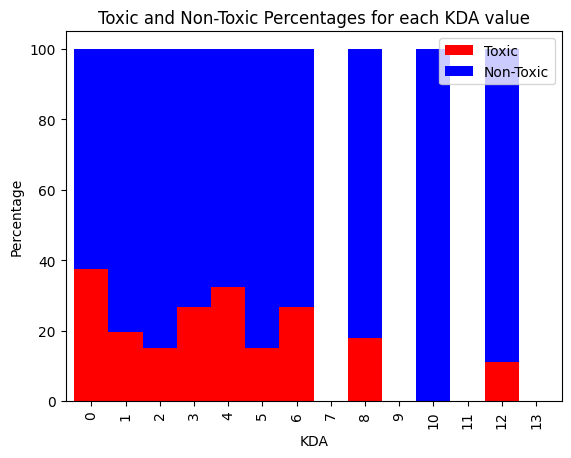

Number of rows in the DataFrame: 375


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# data reading and preprocessing
df = pd.read_csv('csv/500andKDAid.csv')

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# split gather data
X = df['message']
y = df['label']
message_ids = df['message_id']
kda_values = df['kda']

# countvectorizer to convert text into vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()

# convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

# split data into training sets before SMOTE
X_train, X_test, y_train, y_test, ids_train, ids_test, kda_train, kda_test = train_test_split(
    X, y, message_ids, kda_values, test_size=0.75, random_state=42)

# SMOTE on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# convert resampled data to PyTorch tensors
X_train_resampled = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_resampled = torch.tensor(y_train_resampled, dtype=torch.float32)

# define Bidirectional LSTM model
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :]) 
        out = self.sigmoid(out)
        return out

# initialize model / loss function / optimizer
input_size = X_train_resampled.shape[1]
hidden_size = 128
num_layers = 2
output_size = 1

model = BiLSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train model
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train_resampled), batch_size):
        inputs = X_train_resampled[i:i+batch_size]
        labels = y_train_resampled[i:i+batch_size]

        # forward pass
        outputs = model(inputs.unsqueeze(1)) 
        loss = criterion(outputs.squeeze(), labels)

        # backward optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# model eval
with torch.no_grad():
    model.eval()
    y_pred = model(X_test.unsqueeze(1))

y_pred = (y_pred > 0.5).float()
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy(Bidirectional Long Short-Term Memory [LSTM]): {accuracy:.4f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

# Create a new DataFrame with messages, message id, kda, and labels generated by the model
new_df = pd.DataFrame({
    'message_id': ids_test,
    'message': X_test[:, 0].tolist(),
    'kda': kda_test.tolist(),
    'predicted_label': y_pred.flatten().tolist()
})

# Add a new column 'Toxic' based on the predicted labels
new_df['Toxic'] = new_df['predicted_label'].apply(lambda x: 'Toxic' if x == 1 else 'Non-Toxic')

# Bin the KDA values into ranges
bins = list(range(0, 15))  # Adjust this to fit your specific KDA ranges
new_df['kda_bins'] = pd.cut(new_df['kda'], bins=bins, include_lowest=True, right=False)

# Calculate the percentage of toxic and non-toxic predictions for each KDA bin
grouped = new_df.groupby(['kda_bins', 'Toxic']).size().unstack(fill_value=0)
percentage_df = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Multiply by 100 to convert to percentage

# Create the stacked bar chart
ax = percentage_df[['Toxic', 'Non-Toxic']].plot(kind='bar', stacked=True, color=['red', 'blue'], width=1)

# Add labels and title
plt.xlabel('KDA')
plt.ylabel('Percentage')
plt.title('Toxic and Non-Toxic Percentages for each KDA value')
plt.legend()

# Adjust x-axis labels
ax.set_xticklabels(range(0, 14))

# Display the plot
plt.show()

row_count = len(new_df)
print(f"Number of rows in the DataFrame: {row_count}")

